#**Predictive Modelling**

Heart Disease Dataset Classification Model

- Data pre-processing
- Data exploration
- Feature engineering
- Build predictive models
- Evaluate predictive models
- Model explainability

### **Loading necessary libraries**

In [ ]:
# Data Manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Predictive Analytics models
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection  import train_test_split

from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

## **Loading the Datasets**

In [ ]:
df_train = pd.read_csv('heart_disease_train.csv')  # Load the dataset
df_test = pd.read_csv('heart_disease_test_all.csv')  # Load the dataset

## **Data Preprocessing**

In [ ]:
print(df_train.keys())
print(df_test.keys())

Index(['Id', 'Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'HeartDisease'],
      dtype='object')
Index(['Id', 'Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'HeartDisease'],
      dtype='object')


In [ ]:
df_train.head()

Id  Age Gender ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  PT1000   42      M           ATA        120          198          0   
1  PT1001   54      M           ASY        140          239          0   
2  PT1002   60      M           NAP        141          316          1   
3  PT1003   54      M           ASY        124          266          0   
4  PT1004   55      M           ATA        160          292          1   

  RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0     Normal    155              N      0.0       Up             0  
1     Normal    160              N      1.2       Up             0  
2         ST    122              Y      1.7     Flat             1  
3        LVH    109              Y      2.2     Flat             1  
4     Normal    143              Y      2.0     Flat             1

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              734 non-null    object 
 1   Age             734 non-null    int64  
 2   Gender          734 non-null    object 
 3   ChestPainType   734 non-null    object 
 4   RestingBP       734 non-null    int64  
 5   Cholesterol     734 non-null    int64  
 6   FastingBS       734 non-null    int64  
 7   RestingECG      734 non-null    object 
 8   MaxHR           734 non-null    int64  
 9   ExerciseAngina  734 non-null    object 
 10  Oldpeak         734 non-null    float64
 11  ST_Slope        734 non-null    object 
 12  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 74.7+ KB


In [ ]:
df_test.head()

Id  Age Gender ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  PT1800   64      M           ASY        134          273          0   
1  PT1801   58      M           ASY        114          318          0   
2  PT1802   47      F           ATA        140          257          0   
3  PT1803   64      M           ASY        141          244          1   
4  PT1804   47      M           NAP        110            0          1   

  RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0     Normal    102              Y      4.0     Down             1  
1         ST    140              N      4.4     Down             1  
2     Normal    135              N      1.0       Up             0  
3         ST    116              Y      1.5     Flat             1  
4     Normal    120              Y      0.0     Flat             1

## **Data Exploration**

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              184 non-null    object 
 1   Age             184 non-null    int64  
 2   Gender          184 non-null    object 
 3   ChestPainType   184 non-null    object 
 4   RestingBP       184 non-null    int64  
 5   Cholesterol     184 non-null    int64  
 6   FastingBS       184 non-null    int64  
 7   RestingECG      184 non-null    object 
 8   MaxHR           184 non-null    int64  
 9   ExerciseAngina  184 non-null    object 
 10  Oldpeak         184 non-null    float64
 11  ST_Slope        184 non-null    object 
 12  HeartDisease    184 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 18.8+ KB


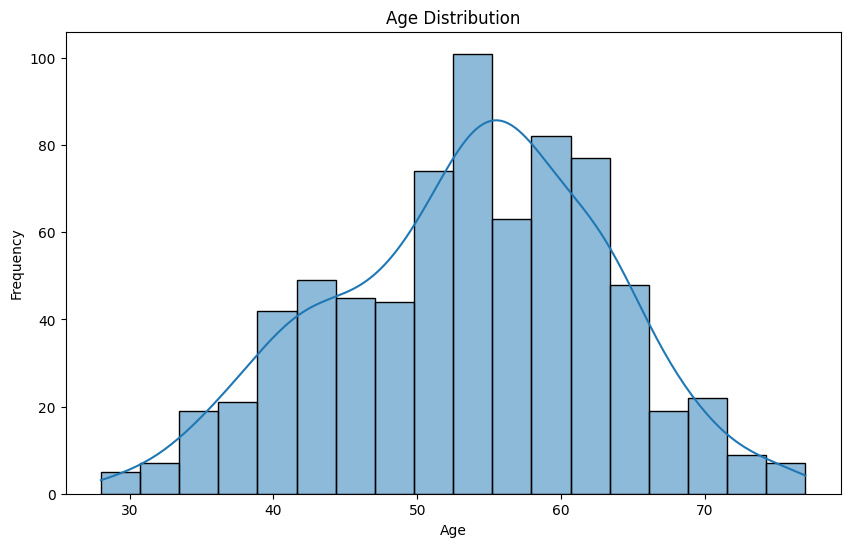

In [ ]:
# Histogram to visualize the age distribution.
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Post of the population are aged between 50 and 60.

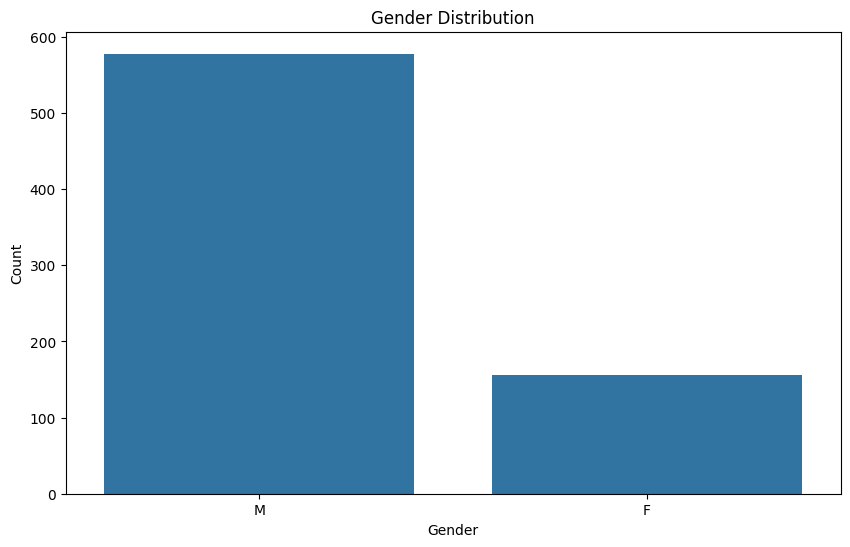

In [ ]:
# Bar plot to show the count of male and female participants.
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df_train)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Female are under-represented in this dataset. Only a third of Male population.

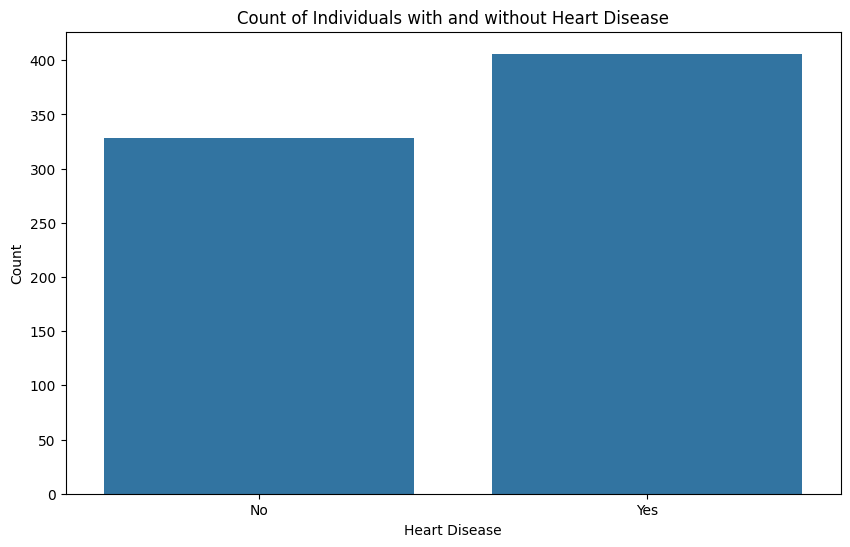

In [ ]:
# Bar plot to show the count of individuals with and without heart disease.
plt.figure(figsize=(10,6))
sns.countplot(x='HeartDisease', data=df_train)
plt.title('Count of Individuals with and without Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

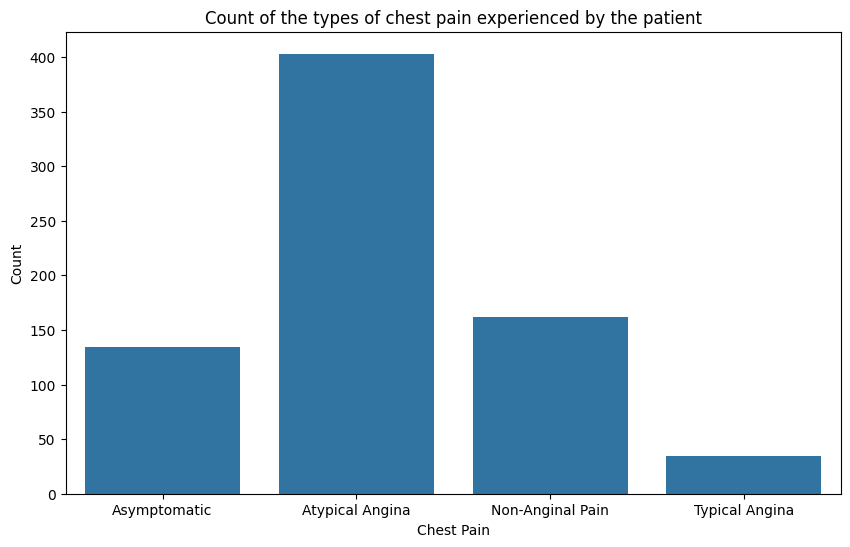

In [ ]:
# Bar plot to show the count of chest pain types.
plt.figure(figsize=(10,6))
sns.countplot(x='ChestPainType', data=df_train)
plt.title('Count of the types of chest pain experienced by the patient')
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Asymptomatic', 'Atypical Angina', 'Non-Anginal Pain', 'Typical Angina'])
plt.show()

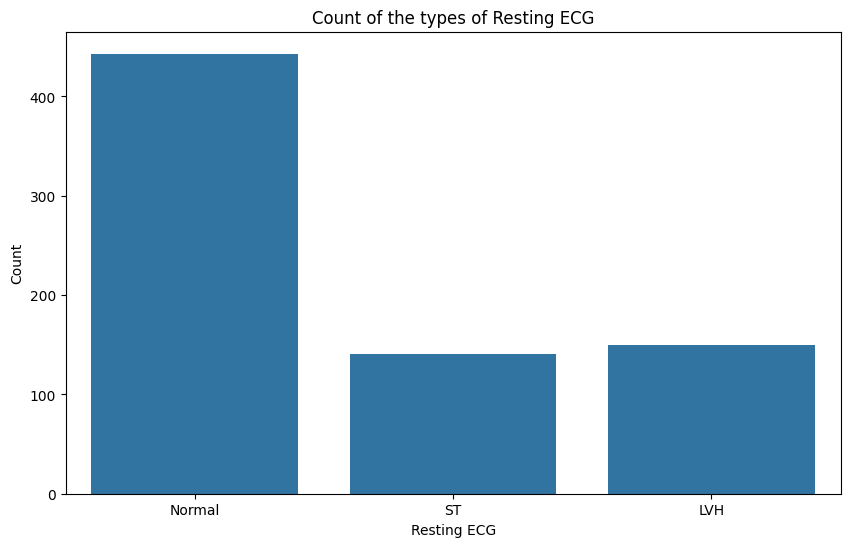

In [ ]:
# Bar plot to show the count of individuals with and without heart disease.
plt.figure(figsize=(10,6))
sns.countplot(x='RestingECG', data=df_train)
plt.title('Count of the types of Resting ECG')
plt.xlabel('Resting ECG')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Normal', 'ST', 'LVH'])
plt.show()

## **Feature Engineering**

In [ ]:
print(df_train.dtypes)

Id                 object
Age                 int64
Gender             object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


Dropping ID

In [ ]:
df_train.drop(columns=['Id'], inplace = True)

In [ ]:
df_test.drop(columns=['Id'], inplace = True)

Changing datatypes with One Hot Encoder

In [ ]:
def one_hot_encode_columns(df, columns_to_encode):
    encoder = OneHotEncoder(sparse=False, drop='first')
    encoded_features = encoder.fit_transform(df[columns_to_encode])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(columns_to_encode))
    df_encoded = pd.concat([df, encoded_df], axis=1)
    df_encoded.drop(columns_to_encode, axis=1, inplace=True)

    return df_encoded

In [ ]:
columns_to_encode = ['Gender', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
df_train_encoded = one_hot_encode_columns(df_train, columns_to_encode)
df_train_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   42        120          198          0    155      0.0             0   
1   54        140          239          0    160      1.2             0   
2   60        141          316          1    122      1.7             1   
3   54        124          266          0    109      2.2             1   
4   55        160          292          1    143      2.0             1   

   Gender_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0       1.0                1.0                0.0               0.0   
1       1.0                0.0                0.0               0.0   
2       1.0                0.0                1.0               0.0   
3       1.0                0.0                0.0               0.0   
4       1.0                1.0                0.0               0.0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                1.0            0.0               0.0            0.0   
1                1.0            0.0               0.0            0.0   
2                0.0            1.0               1.0            1.0   
3                0.0            0.0               1.0            1.0   
4                1.0            0.0               1.0            1.0   

   ST_Slope_Up  
0          1.0  
1          1.0  
2          0.0  
3          0.0  
4          0.0

In [ ]:
df_test_encoded = one_hot_encode_columns(df_test, columns_to_encode)
df_test_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   64        134          273          0    102      4.0             1   
1   58        114          318          0    140      4.4             1   
2   47        140          257          0    135      1.0             0   
3   64        141          244          1    116      1.5             1   
4   47        110            0          1    120      0.0             1   

   Gender_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0       1.0                0.0                0.0               0.0   
1       1.0                0.0                0.0               0.0   
2       0.0                1.0                0.0               0.0   
3       1.0                0.0                0.0               0.0   
4       1.0                0.0                1.0               0.0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                1.0            0.0               1.0            0.0   
1                0.0            1.0               0.0            0.0   
2                1.0            0.0               0.0            0.0   
3                0.0            1.0               1.0            1.0   
4                1.0            0.0               1.0            1.0   

   ST_Slope_Up  
0          0.0  
1          0.0  
2          1.0  
3          0.0  
4          0.0

**Correlation Analysis and Dimensionality Reduction**

<Axes: >

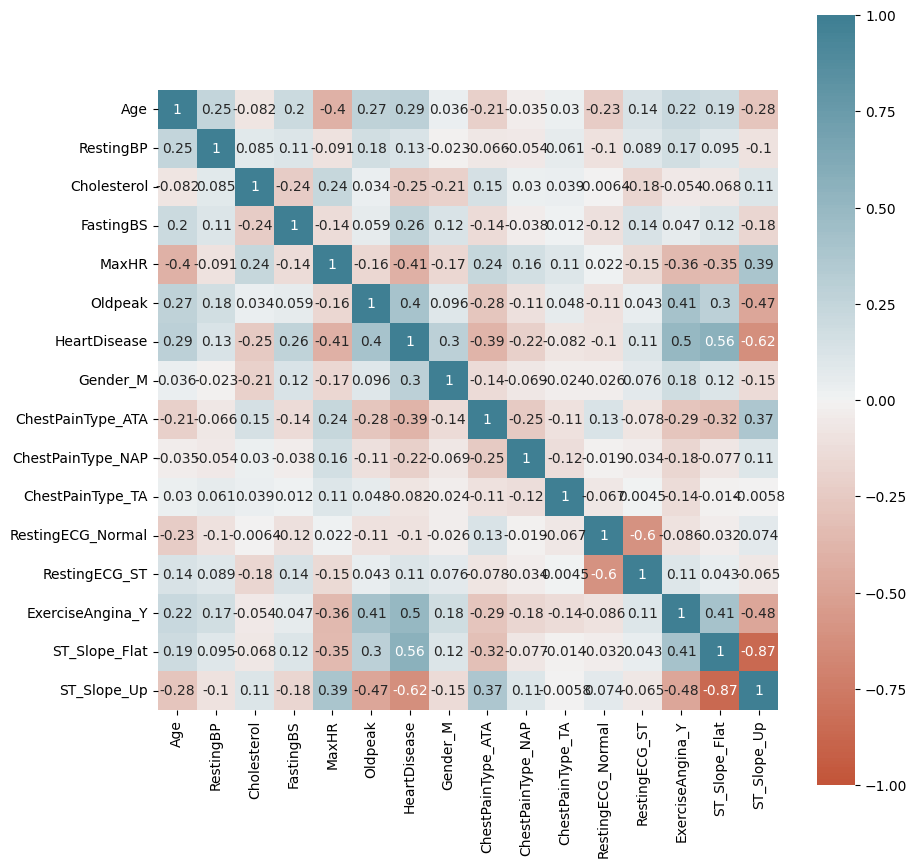

In [ ]:
plt.figure(figsize=(10, 10))
corr = df_train_encoded.corr()
sns.heatmap(corr, annot = True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ST_Slope_Flat and ST_Slope_Up have high negative correlation at -0.87.
RestingECG_ST and RestingECG_Normal have high negative correlation at -0.6.
ST_Slope_Up and HeartDisease have high negative correlation at -0.62, however, I am not deleting one of these as HeartDisease is our predictive variable. This relation indicates that ST_Slope_Up is negatively correlated with HeartDisease.

In [ ]:
df_train_encoded.drop(['ST_Slope_Flat', 'RestingECG_ST'], axis=1, inplace=True)

In [ ]:
df_test_encoded.drop(['ST_Slope_Flat', 'RestingECG_ST'], axis=1, inplace=True)

In [ ]:
df_train_encoded.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   42        120          198          0    155      0.0             0   
1   54        140          239          0    160      1.2             0   
2   60        141          316          1    122      1.7             1   
3   54        124          266          0    109      2.2             1   
4   55        160          292          1    143      2.0             1   

   Gender_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0       1.0                1.0                0.0               0.0   
1       1.0                0.0                0.0               0.0   
2       1.0                0.0                1.0               0.0   
3       1.0                0.0                0.0               0.0   
4       1.0                1.0                0.0               0.0   

   RestingECG_Normal  ExerciseAngina_Y  ST_Slope_Up  
0                1.0               0.0          1.0  
1                1.0               0.0          1.0  
2                0.0               1.0          0.0  
3                0.0               1.0          0.0  
4                1.0               1.0          0.0

## **Spliting data**

In [ ]:
df_train_encoded.keys()

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Gender_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'ExerciseAngina_Y',
       'ST_Slope_Up'],
      dtype='object')

In [ ]:
df_test_encoded.keys()

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Gender_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'ExerciseAngina_Y',
       'ST_Slope_Up'],
      dtype='object')

In [ ]:
# split the dataset into predictors (df_x) and target variable (df_y)
X_train = df_train_encoded[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'Gender_M', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal',
       'ExerciseAngina_Y', 'ST_Slope_Up']]
Y_train = df_train_encoded[['HeartDisease']]

In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.20, random_state = 5)

print('Train Shape (rows, columns):', X_train.shape)
print('Validation Shape (rows, columns):', X_validation.shape)

Train Shape (rows, columns): (587, 13)
Validation Shape (rows, columns): (147, 13)


In [ ]:
X_test = df_test_encoded[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'Gender_M', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal',
       'ExerciseAngina_Y', 'ST_Slope_Up']]
Y_test = df_test_encoded[['HeartDisease']]

## **Modeling**

## **Decision Tree Classification**

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_validation)

### **Accuracy Evaluation**

In [ ]:
# Evaluate Accuracy
accuracy = accuracy_score(Y_validation, Y_predict)
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

Validation Accuracy: 76.19%


### **Visualise the decision tree**

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

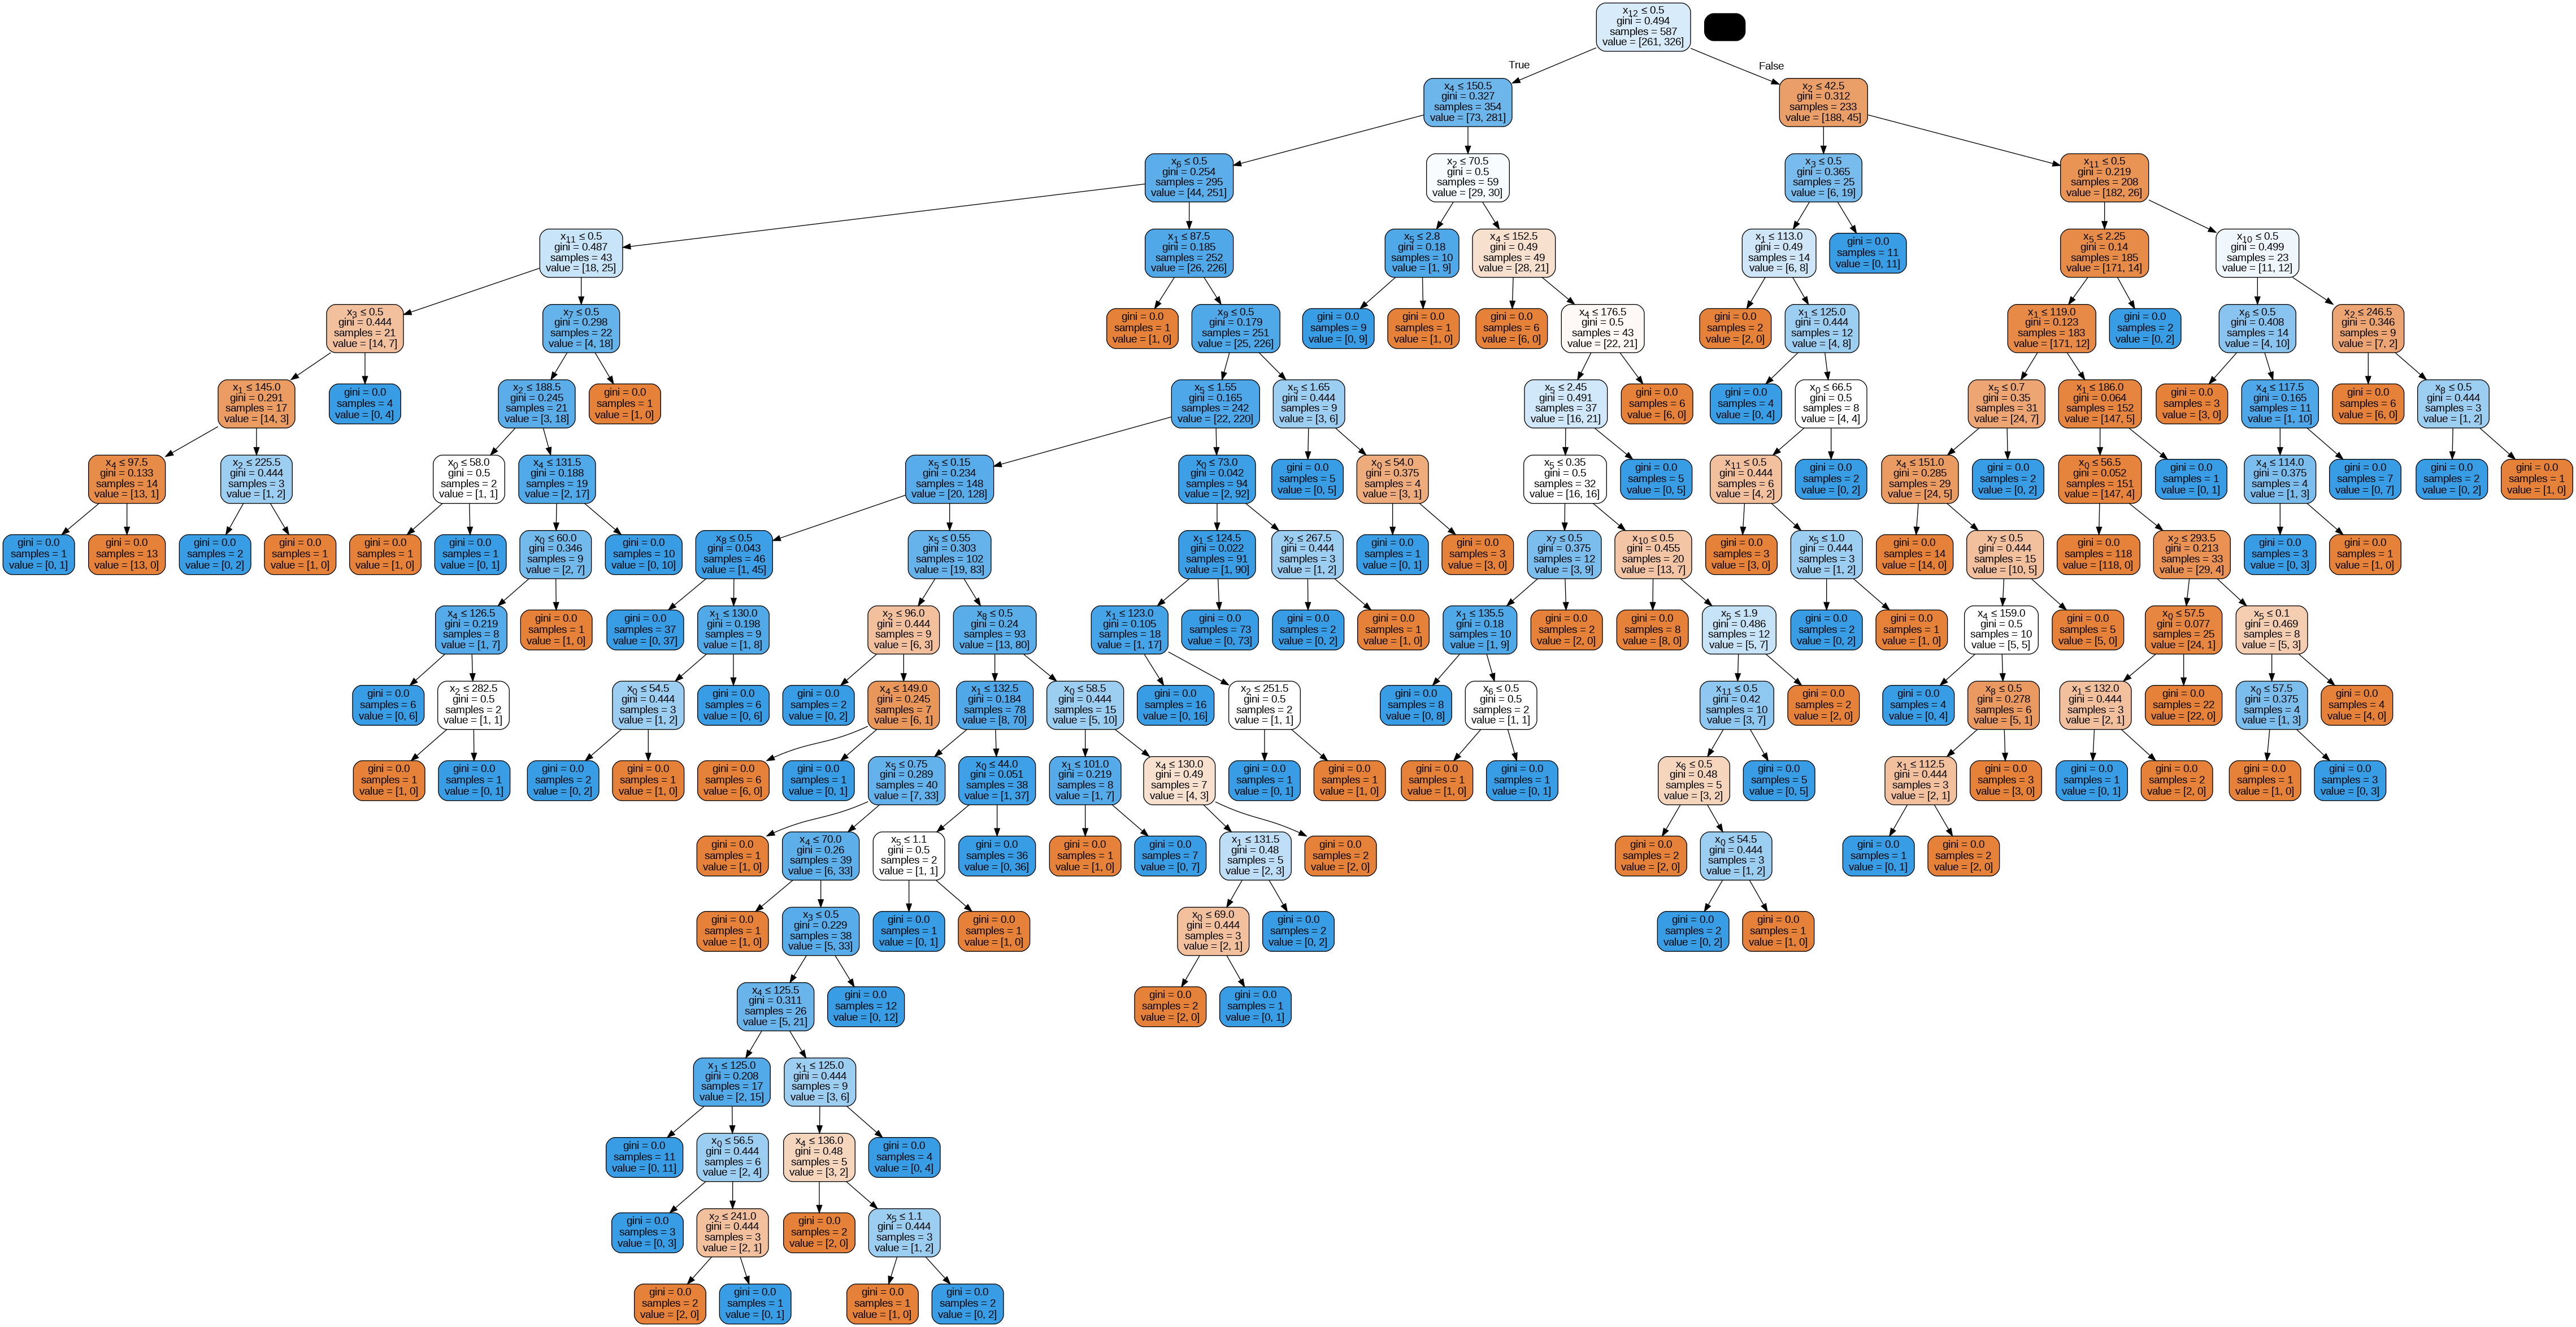

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## **Neural Network Classification**

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(20), max_iter=1000)

In [ ]:
mlp.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=20, max_iter=1000)

In [ ]:
Y_predict = mlp.predict(X_validation)

### **Accuracy Evaluation**

In [ ]:
# Evaluate Accuracy
accuracy = accuracy_score(Y_validation, Y_predict)
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

Validation Accuracy: 87.07%


## **Logistic Regression**

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
Y_pred = model.predict(X_validation)

### **Accuracy Evaluation**

In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_validation, Y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8707482993197279


## **XGBoost**

In [ ]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions
y_pred = model.predict(X_validation)

### **Accuracy Evaluation**

In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_validation, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8843537414965986


All the models performed well in Validation set.

## **Model Evaluation**

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
mlp = MLPClassifier(random_state=42)
logistic_regression = LogisticRegression(random_state=42)
xgboost = XGBClassifier(random_state=42)

In [ ]:
# Fit models
decision_tree.fit(X_train, Y_train)
mlp.fit(X_train, Y_train)
logistic_regression.fit(X_train, Y_train)
xgboost.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predictions
dt_pred = decision_tree.predict(X_test)
mlp_pred = mlp.predict(X_test)
lr_pred = logistic_regression.predict(X_test)
xgb_pred = xgboost.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Evaluation
def evaluate_model(name, y_test, y_pred, model):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Confusion Matrix:\n{conf_matrix}")
    print(f"{name} Classification Report:\n{class_report}")
    print(f"{name} ROC AUC Score: {roc_auc}")

    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Decision Tree Accuracy: 0.1793478260869565
Decision Tree Confusion Matrix:
[[15 67]
 [84 18]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.18      0.17        82
           1       0.21      0.18      0.19       102

    accuracy                           0.18       184
   macro avg       0.18      0.18      0.18       184
weighted avg       0.18      0.18      0.18       184

Decision Tree ROC AUC Score: 0.17969870875179345


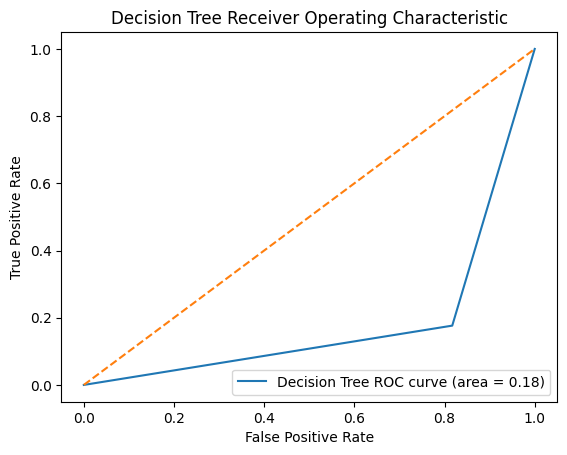

In [ ]:
evaluate_model("Decision Tree", Y_test, dt_pred, decision_tree)

An ROC AUC score below 0.75 indicates that the Decision Tree model is performing better than random guessing.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: Use

MLP Classifier Accuracy: 0.5543478260869565
MLP Classifier Confusion Matrix:
[[  0  82]
 [  0 102]]
MLP Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.55      1.00      0.71       102

    accuracy                           0.55       184
   macro avg       0.28      0.50      0.36       184
weighted avg       0.31      0.55      0.40       184

MLP Classifier ROC AUC Score: 0.41989478718316603


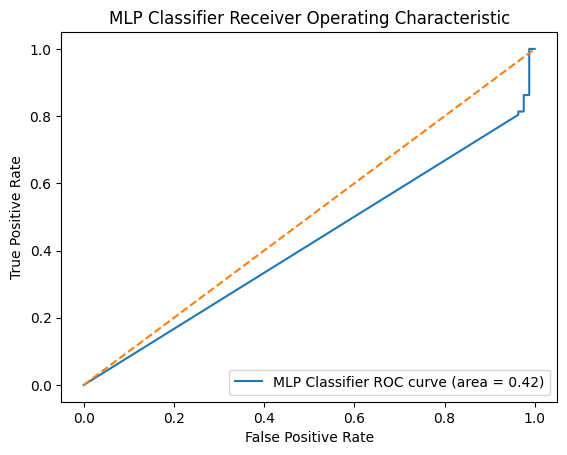

In [ ]:
evaluate_model("MLP Classifier", Y_test, mlp_pred, mlp)

An ROC AUC score of 0.44 for the MLP Classifier indicates that it is performing worse than random guessing.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Logistic Regression Accuracy: 0.45108695652173914
Logistic Regression Confusion Matrix:
[[ 82   0]
 [101   1]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        82
           1       1.00      0.01      0.02       102

    accuracy                           0.45       184
   macro avg       0.72      0.50      0.32       184
weighted avg       0.75      0.45      0.29       184

Logistic Regression ROC AUC Score: 0.5967240554758488


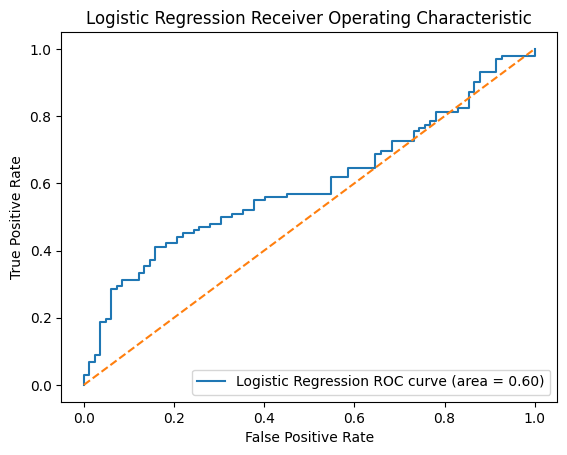

In [ ]:
evaluate_model("Logistic Regression", Y_test, lr_pred, logistic_regression)

XGBoost Accuracy: 0.6630434782608695
XGBoost Confusion Matrix:
[[56 26]
 [36 66]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.68      0.64        82
           1       0.72      0.65      0.68       102

    accuracy                           0.66       184
   macro avg       0.66      0.66      0.66       184
weighted avg       0.67      0.66      0.66       184

XGBoost ROC AUC Score: 0.7436035389765663


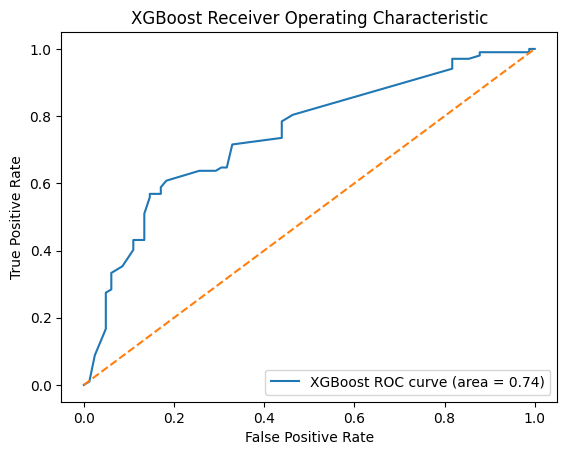

In [ ]:
evaluate_model("XGBoost", Y_test, xgb_pred, xgboost)

ROC AUC Score: This score is quite high, indicating that the XGBoost model has a strong ability to distinguish between the positive and negative classes. An ROC AUC score close to 1.0 signifies excellent performance, and in this case, a score of approximately 0.74 suggests that the XGBoost model is performing well.

## **Model Explainability**

### **Shap Explainer**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.6 MB/s eta 0:00:00


In [ ]:
import shap

### **Shap on XGBoost Model**

In [ ]:
explainer = shap.TreeExplainer(xgboost)
shap_values = explainer(X_train)

Actual values:
[ 0.14099815  0.89152636 -0.36534448 -0.55701693  0.55358995 -0.88505628
  0.53335157 -0.4585949  -0.54650944 -0.21957752 -1.23260428 -0.8345848
  1.23260428]
HeartDisease:
HeartDisease    0
Name: 664, dtype: int64


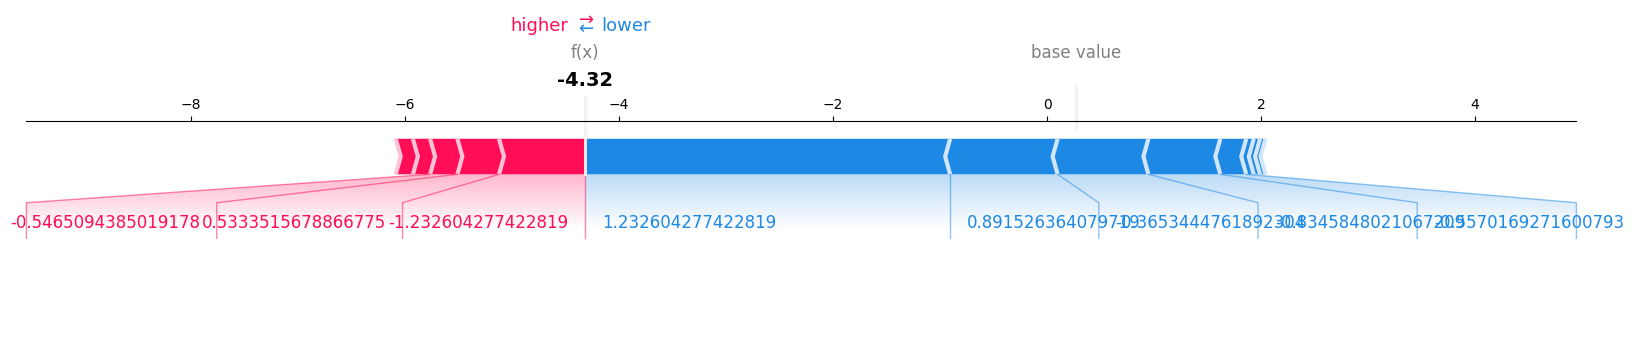

In [ ]:
record_id = 4

print('Actual values:')
print(X_train[record_id,:])

print('HeartDisease:')
print(Y_train.iloc[record_id,:])
# Looks like Google Colab needs shap.initjs() in every cell where there is a visualization.
shap.initjs()

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.plots.force(shap_values[record_id], matplotlib=True)

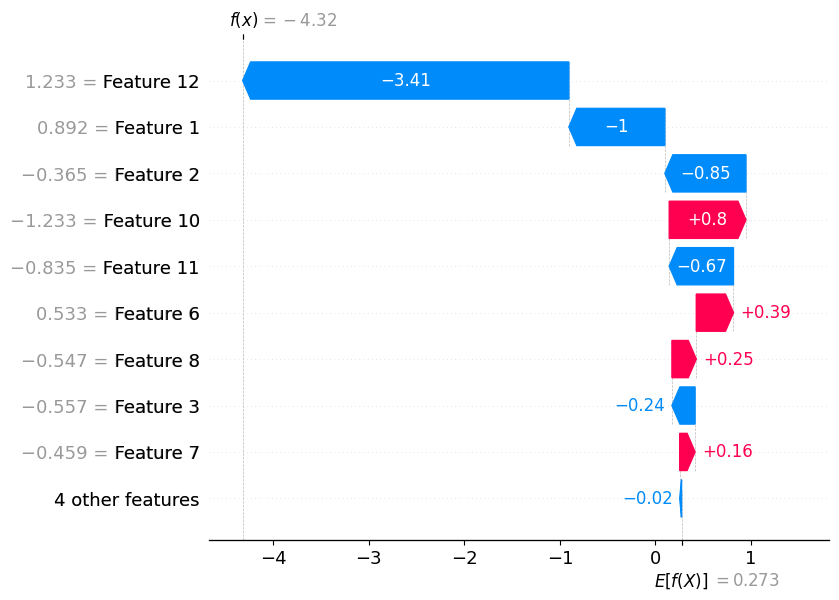

In [ ]:
# visualize the prediction of given record id
shap.plots.waterfall(shap_values[record_id])

As seen before in the correlation matrix, ST_Slope_UP has a negative effect in Heart Disease Detection.
RestingBP and Cholesterol have also contributed to the model performance.

In [ ]:
# Looks like Google Colab needs shap.initjs() in every cell where there is a visualization.
shap.initjs()
shap.plots.force(shap_values)

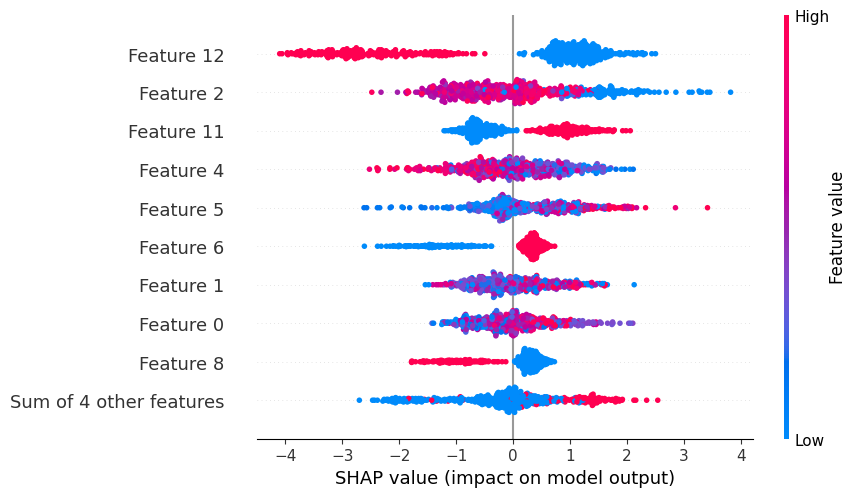

In [ ]:
# summarize the effects of all the features
shap.initjs()
shap.plots.beeswarm(shap_values)

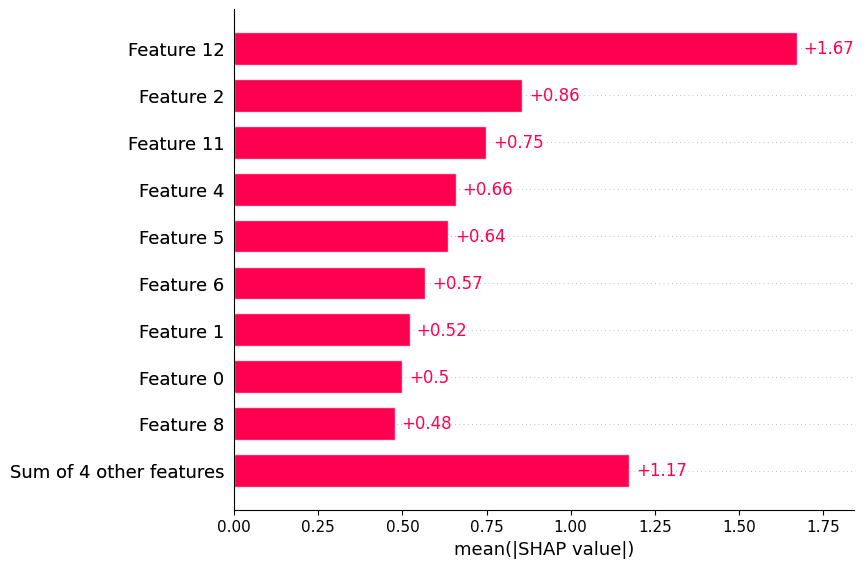

In [ ]:
shap.initjs()
shap.plots.bar(shap_values)

Impacted by ST_Slope_Up, RestingBP, and ExerciseAngina_Y.